1st column is the acceleration data in the X axis measured by the sensor ADXL345.
2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.
3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.

4th column is the rotation data in the X axis measured by the sensor ITG3200.
5th column is the rotation data in the Y axis measured by the sensor ITG3200.
6th column is the rotation data in the Z axis measured by the sensor ITG3200.

7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.
8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.
9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.

File name format:
**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

**Activities of Daily Living (ADL):**

<!-- <div align="center"> -->

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| D01  | Walking slowly                                                                           | 1      | 100s     |
| D02  | Walking quickly                                                                          | 1      | 100s     |
| D03  | Jogging slowly                                                                           | 1      | 100s     |
| D04  | Jogging quickly                                                                          | 1      | 100s     |
| D05  | Walking upstairs and downstairs slowly                                                   | 5      | 25s      |
| D06  | Walking upstairs and downstairs quickly                                                  | 5      | 25s      |
| D07  | Slowly sit in a half height chair, wait a moment, and up slowly                          | 5      | 12s      |
| D08  | Quickly sit in a half height chair, wait a moment, and up quickly                        | 5      | 12s      |
| D09  | Slowly sit in a low height chair, wait a moment, and up slowly                           | 5      | 12s      |
| D10  | Quickly sit in a low height chair, wait a moment, and up quickly                         | 5      | 12s      |
| D11  | Sitting a moment, trying to get up, and collapse into a chair                            | 5      | 12s      |
| D12  | Sitting a moment, lying slowly, wait a moment, and sit again                             | 5      | 12s      |
| D13  | Sitting a moment, lying quickly, wait a moment, and sit again                            | 5      | 12s      |
| D14  | Being on one's back change to lateral position, wait a moment, and change to one's back  | 5      | 12s      |
| D15  | Standing, slowly bending at knees, and getting up                                        | 5      | 12s      |
| D16  | Standing, slowly bending without bending knees, and getting up                           | 5      | 12s      |
| D17  | Standing, get into a car, remain seated and get out of the car                           | 5      | 25s      |
| D18  | Stumble while walking                                                                    | 5      | 12s      |
| D19  | Gently jump without falling (trying to reach a high object)                              | 5      | 12s      |


Falls:

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| F01  | Fall forward while walking caused by a slip                                              | 5      | 15s      |
| F02  | Fall backward while walking caused by a slip                                             | 5      | 15s      |
| F03  | Lateral fall while walking caused by a slip                                              | 5      | 15s      |
| F04  | Fall forward while walking caused by a trip                                              | 5      | 15s      |
| F05  | Fall forward while jogging caused by a trip                                              | 5      | 15s      |
| F06  | Vertical fall while walking caused by fainting                                           | 5      | 15s      |
| F07  | Fall while walking, with use of hands in a table to dampen fall, caused by fainting      | 5      | 15s      |
| F08  | Fall forward when trying to get up                                                       | 5      | 15s      |
| F09  | Lateral fall when trying to get up                                                       | 5      | 15s      |
| F10  | Fall forward when trying to sit down                                                     | 5      | 15s      |
| F11  | Fall backward when trying to sit down                                                    | 5      | 15s      |
| F12  | Lateral fall when trying to sit down                                                     | 5      | 15s      |
| F13  | Fall forward while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
| F14  | Fall backward while sitting, caused by fainting or falling asleep                        | 5      | 15s      |
| F15  | Lateral fall while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
<!-- </div> -->

File name format:

**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

- 23 adult subject    ---> SA01 ~ SA23
- 15 elderly subject  ---> SE01~ SE15

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
# Path to your main dataset folder
base_path = 'DataSet/SisFall_dataset'

# Create list of folder names (SA01 to SA23 and SE01 to SE15)
subject_ids = [f'SA{str(i).zfill(2)}' for i in range(1, 24)] + [f'SE{str(i).zfill(2)}' for i in range(1, 16)]

all_data = []       # List to store all data (each item is a 2D array from a file)
all_labels = []     # List to store labels corresponding to each data array

counter = 0
ADL = 0
FALL = 0

for subject_id in subject_ids:
    folder_path = os.path.join(base_path, subject_id)

    if not os.path.isdir(folder_path):
        print(f"Folder not found: {folder_path}")
        continue

    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)

            try:
                # Extract activity code from filename (assuming format is like 'D01_01.txt')
                activity_code = filename.split('_')[0]
                # determine label
                if activity_code.startswith('D'):
                    label = 'ADL'
                    ADL += 1
                elif activity_code.startswith('F'):
                    label = 'Fall'
                    FALL += 1
                else:
                    label = 'Unknown'

                # Load the first 6 columns of comma-separated file
                df = pd.read_csv(file_path, header=None, delimiter=',', usecols=[0, 1, 2, 3, 4, 5], on_bad_lines='skip')
                data = df.to_numpy()    # Convert to NumPy array
                data = data.transpose()  # Transpose the data to get the desired shape
                
                # Append the 2D array to the list
                all_data.append(data)
                all_labels.append(label)
                counter += 1

            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                
print(f"Total files processed: {counter}")
print(f"Total ADL labels: {ADL}")
print(f"Total Fall labels: {FALL}")


Total files processed: 4505
Total ADL labels: 2707
Total Fall labels: 1798


## validating length/count of data to check if it is correct

In [34]:
print(f'number of total readings: {len(all_data)}')
print(f'number of total labels: {len(all_labels)}')

number of total readings: 4505
number of total labels: 4505


In [35]:
# print number of unique labels and their counts
unique_labels, counts = np.unique(all_labels, return_counts=True)
print("Unique labels and their counts:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")

Unique labels and their counts:
ADL: 2707
Fall: 1798


## separate ADL from Fall

In [36]:
# create lists to store data for each label
adls = []
falls = []

for i in range(len(all_labels)):
    if all_labels[i] == 'ADL':
        adls.append(all_data[i])
    elif all_labels[i] == 'Fall':
        falls.append(all_data[i])

In [37]:
len(adls), len(falls)

(2707, 1798)

In [38]:
falls[1797].shape  # Check the shape of the first 2D array

(6, 2999)

In [39]:
falls[0][0,:]

array([  -9,   -3,   -1, ..., -118, -117, -112])

## plot random file

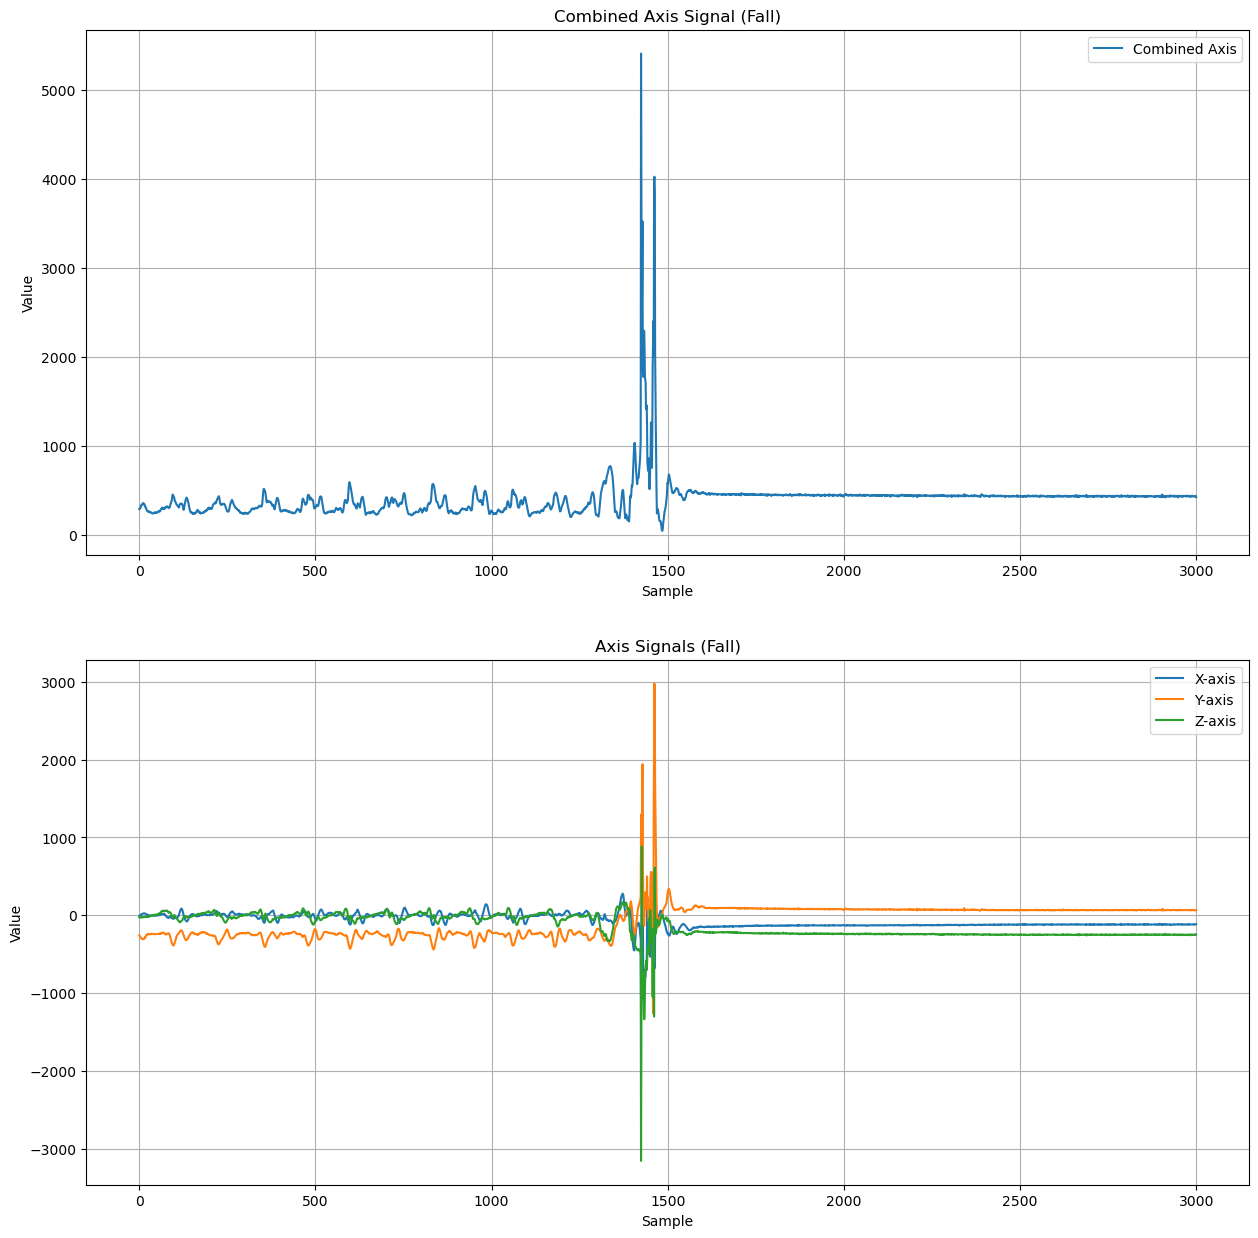

In [40]:
all_axis = np.abs(falls[0][0, :]) + np.abs(falls[0][1, :]) + np.abs(falls[0][2, :])
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 1)
plt.plot(all_axis, label='Combined Axis')
plt.title('Combined Axis Signal (Fall)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(falls[0][0, :], label='X-axis')
plt.plot(falls[0][1, :], label='Y-axis')
plt.plot(falls[0][2, :], label='Z-axis')
plt.title('Axis Signals (Fall)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.show()

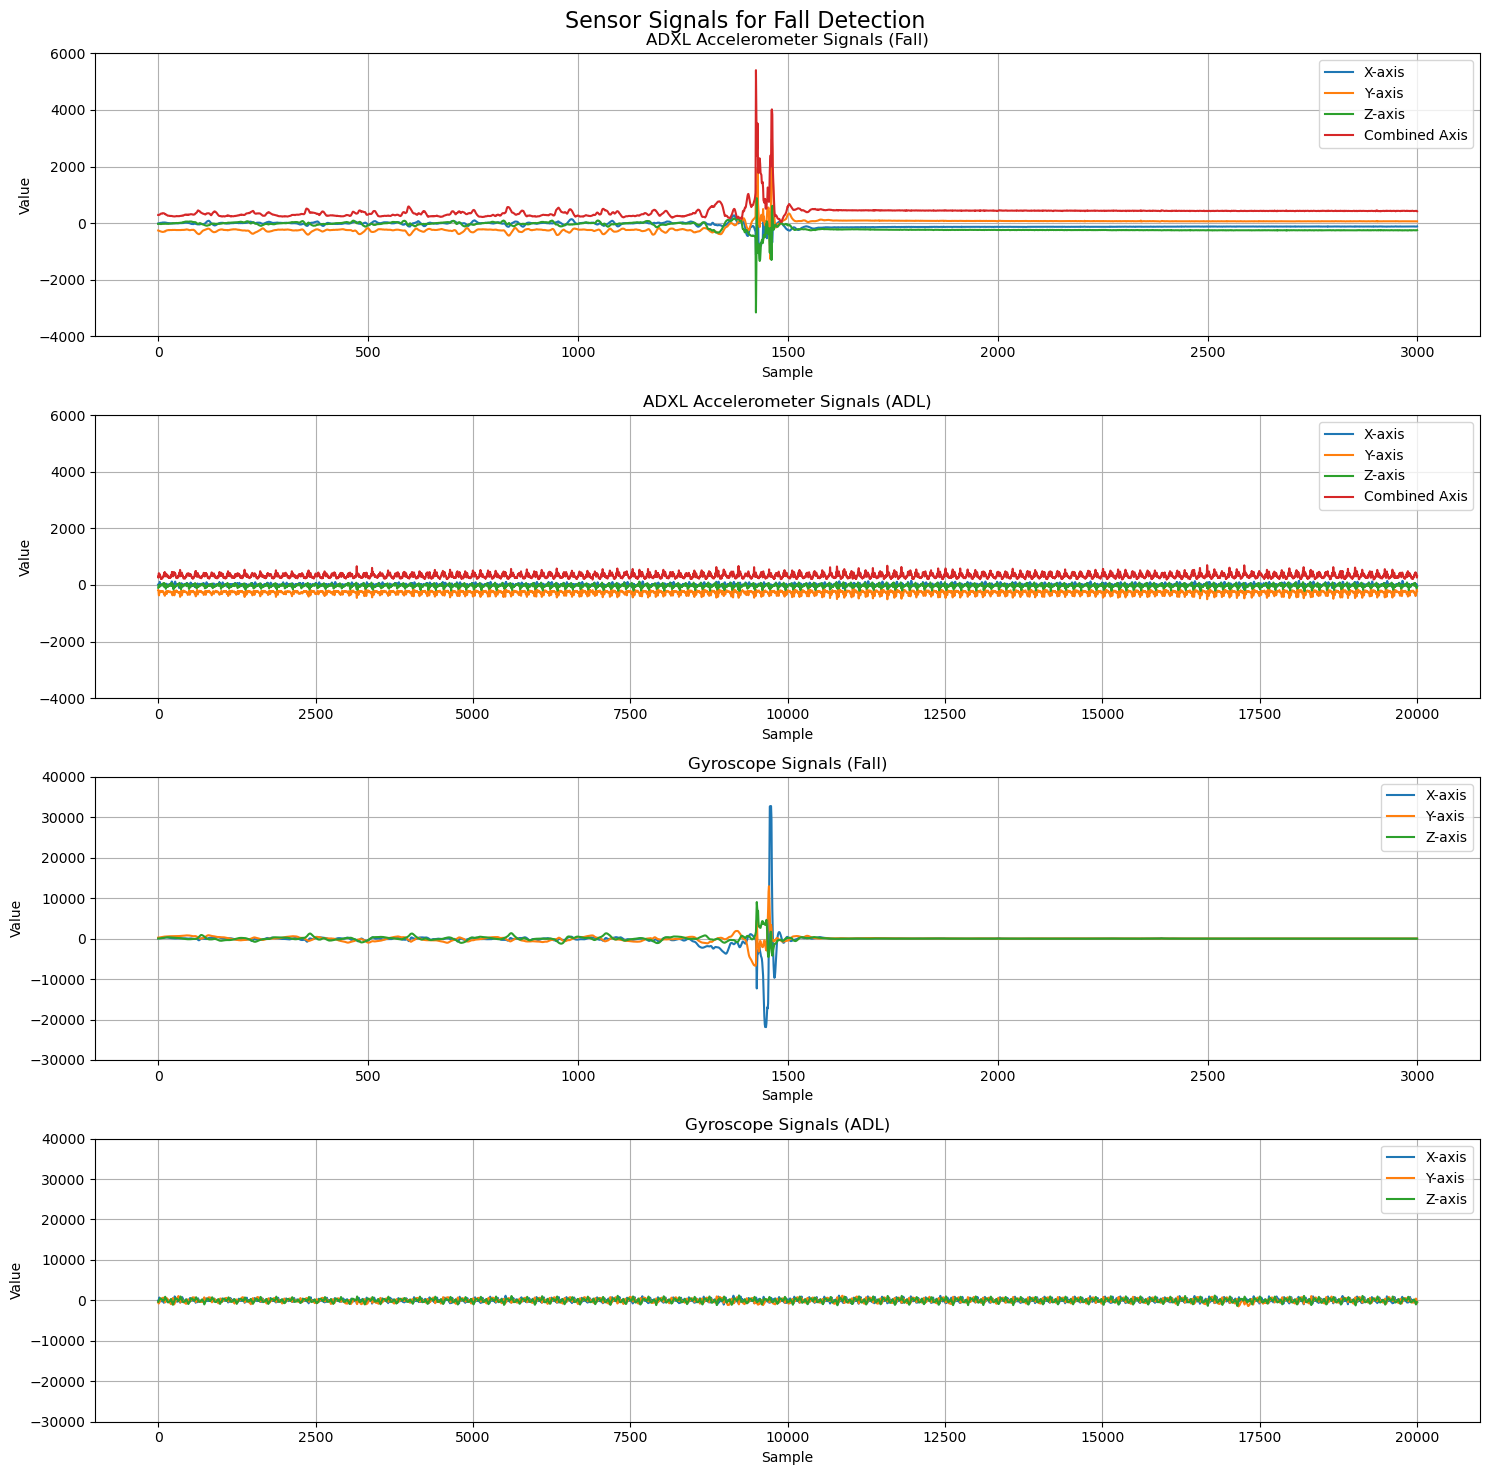

In [41]:
# compare plot of fall recording and adl recording

all_axis_fall = np.abs(falls[0][0, :]) + np.abs(falls[0][1, :]) + np.abs(falls[0][2, :])
all_axis_adl = np.abs(adls[0][0, :]) + np.abs(adls[0][1, :]) + np.abs(adls[0][2, :])

plt.figure(figsize=(15, 15))

# Plot the first 3 signals together
plt.subplot(4, 1, 1)
plt.plot(falls[0][0, :], label='X-axis')
plt.plot(falls[0][1, :], label='Y-axis')
plt.plot(falls[0][2, :], label='Z-axis')
plt.plot(all_axis_fall, label='Combined Axis', linestyle='-')
plt.title('ADXL Accelerometer Signals (Fall)')
plt.ylim(-4000, 6000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(adls[0][0, :], label='X-axis')
plt.plot(adls[0][1, :], label='Y-axis')
plt.plot(adls[0][2, :], label='Z-axis')
plt.plot(all_axis_adl, label='Combined Axis', linestyle='-')
plt.title('ADXL Accelerometer Signals (ADL)')
plt.ylim(-4000, 6000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the last 3 signals and adding together
plt.subplot(4, 1, 3)
plt.plot(falls[0][3, :], label='X-axis')
plt.plot(falls[0][4, :], label='Y-axis')
plt.plot(falls[0][5, :], label='Z-axis')
plt.title('Gyroscope Signals (Fall)')
plt.ylim(-30000, 40000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(adls[0][3, :], label='X-axis')
plt.plot(adls[0][4, :], label='Y-axis')
plt.plot(adls[0][5, :], label='Z-axis')
plt.title('Gyroscope Signals (ADL)')
plt.ylim(-30000, 40000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()


plt.suptitle('Sensor Signals for Fall Detection', fontsize=16)
plt.tight_layout()
plt.show()